In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import json


df = pd.read_csv('cleaned_data.csv')

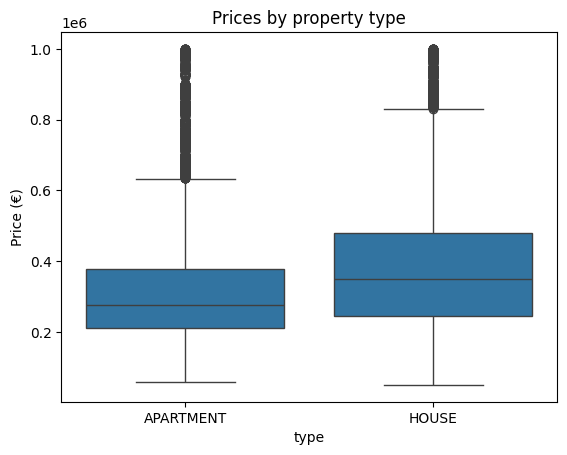

In [ ]:
# yes
def show_boxplot(df):
    sns.boxplot(data=df, x='type', y="price")
    plt.title("Prices by property type")
    plt.ylabel("Price (€)")
    plt.show()

show_boxplot(df)

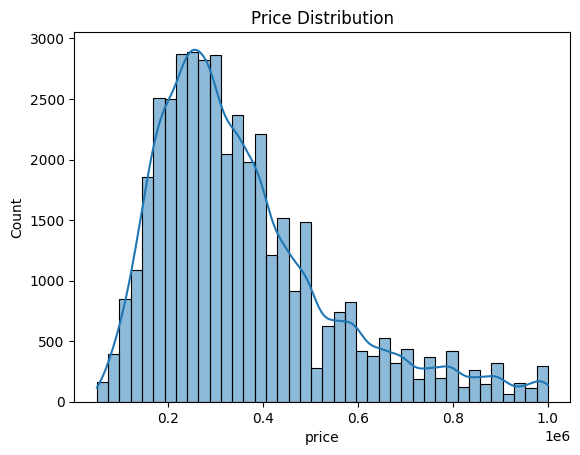

In [ ]:
# yes
def show_price_distribution( df):
    sns.histplot(df['price'], bins=40, kde=True)
    plt.title("Price Distribution")
    plt.show()

show_price_distribution(df)

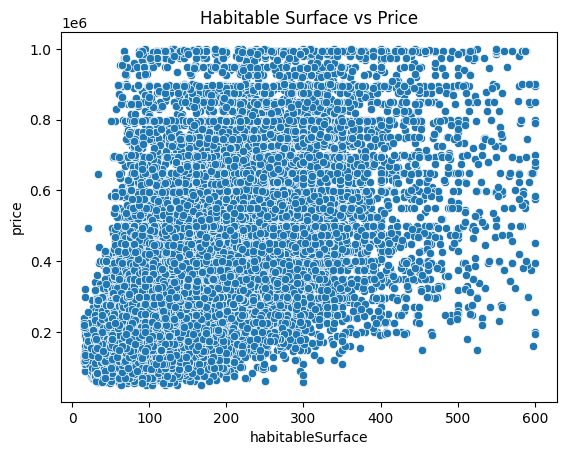

In [ ]:
# no
def show_habitable_surface_vs_price( df):
    sns.scatterplot(x='habitableSurface', y='price', data=df)
    plt.title("Habitable Surface vs Price")
    plt.show()

show_habitable_surface_vs_price(df)

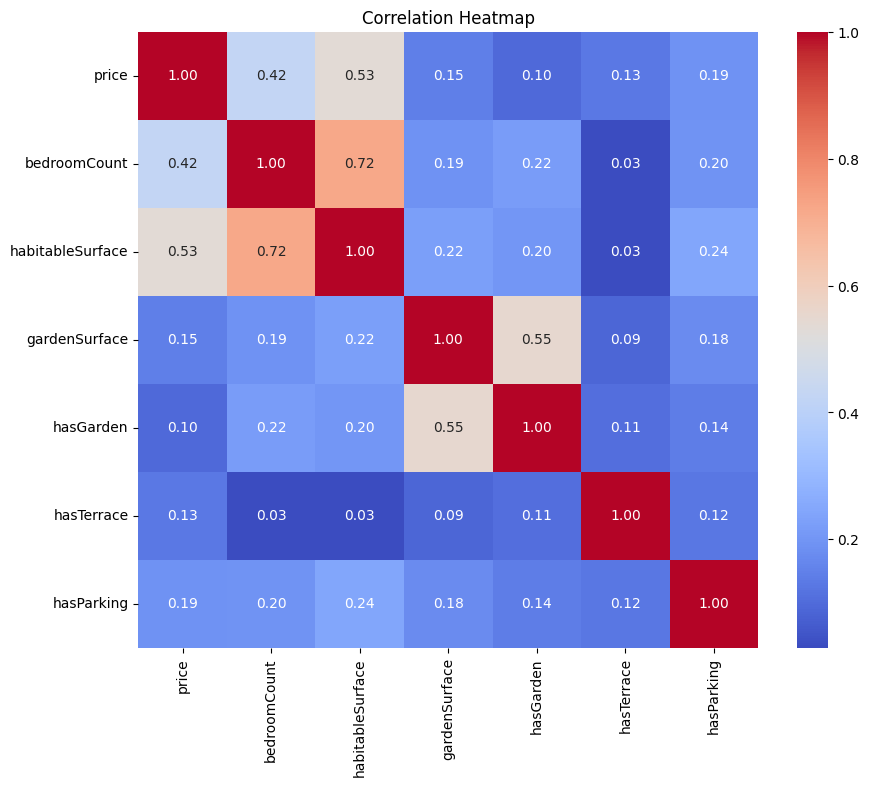

In [ ]:
# yes
def show_correlation_heatmap(df):
    corr_cols = ['price', 'bedroomCount', 'habitableSurface', 'gardenSurface', 'hasGarden', 'hasTerrace', 'hasParking']
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

show_correlation_heatmap(df)

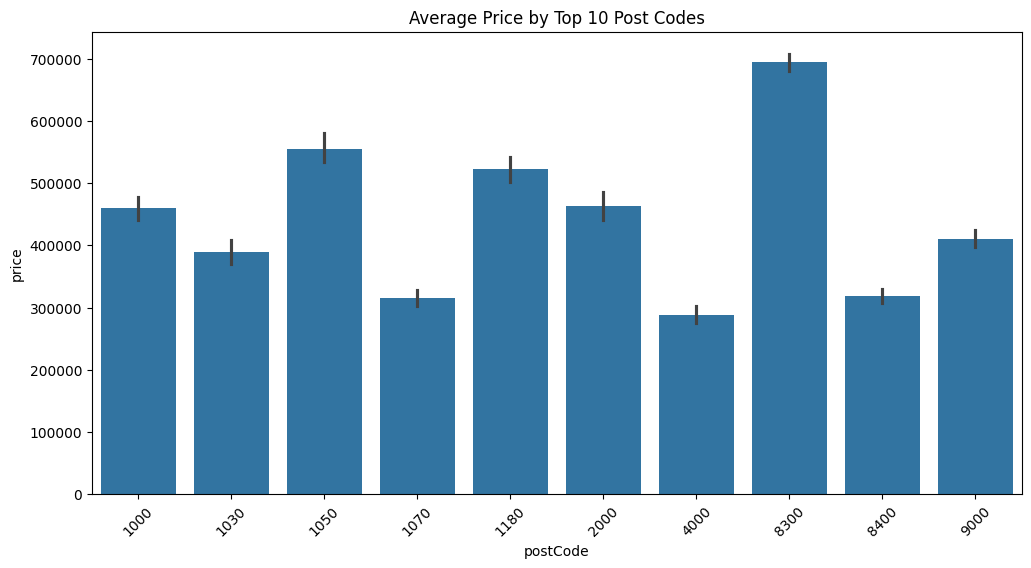

In [ ]:
# if we can improve (sort, add municipality) yes, else no
def show_locality_analysis(df):
    # Top 10 most frequent post codes
    top_postcodes = df['postCode'].value_counts().nlargest(10).index

    # Filter data
    df_local = df[df['postCode'].isin(top_postcodes)]

    # Bar plot of average price by top postcodes
    plt.figure(figsize=(12, 6))
    sns.barplot(x='postCode', y='price', data=df_local, estimator='mean')
    plt.title("Average Price by Top 10 Post Codes")
    plt.xticks(rotation=45)
    plt.show()

show_locality_analysis(df)

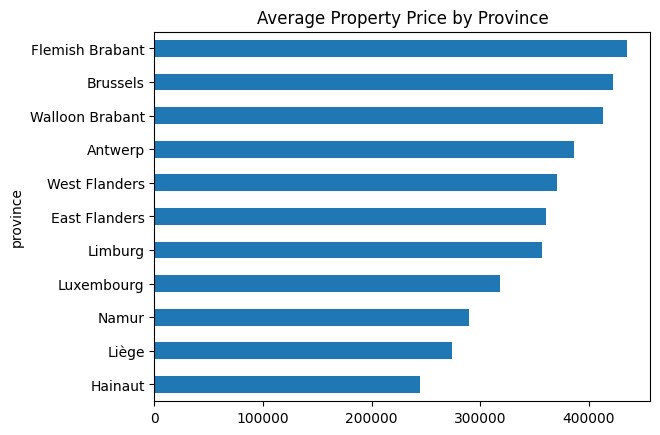

In [ ]:
# yes
def show_average_price_by_province(df):
    avg_price = df.groupby('province')['price'].mean().sort_values()
    avg_price.plot(kind='barh')
    plt.title('Average Property Price by Province')
    plt.show()

show_average_price_by_province(df)

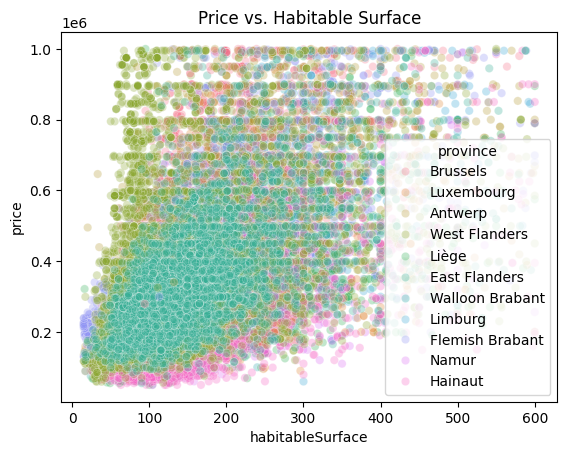

In [ ]:
# no
def show_price_surface_province(df):
    sns.scatterplot(data=df, x='habitableSurface', y='price', alpha=0.3, hue='province')
    plt.title('Price vs. Habitable Surface')
    plt.show()

show_price_surface_province(df)

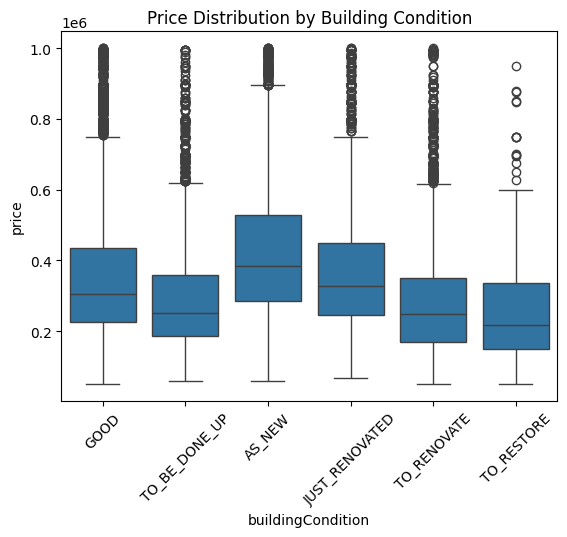

In [ ]:
# yes
def show_price_by_building_conditions(df):
    sns.boxplot(data=df, x='buildingCondition', y='price')
    plt.xticks(rotation=45)
    plt.title('Price Distribution by Building Condition')
    plt.show()

show_price_by_building_conditions(df)

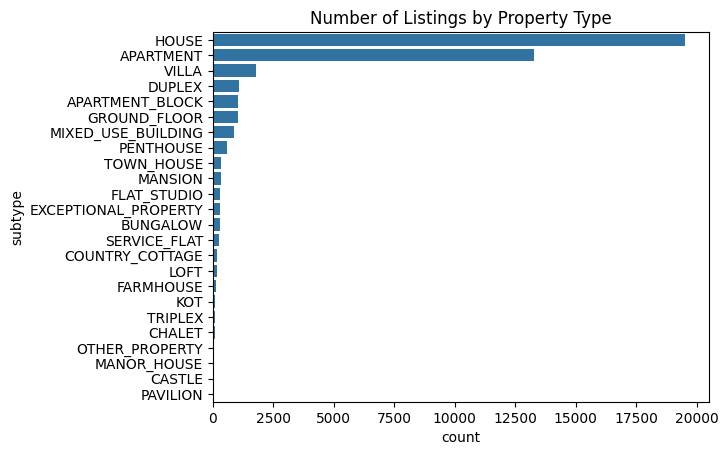

In [ ]:
# no
def count_property_type(df):
    sns.countplot(data=df, y='subtype', order=df['subtype'].value_counts().index)
    plt.title('Number of Listings by Property Type')
    plt.show()

count_property_type(df)

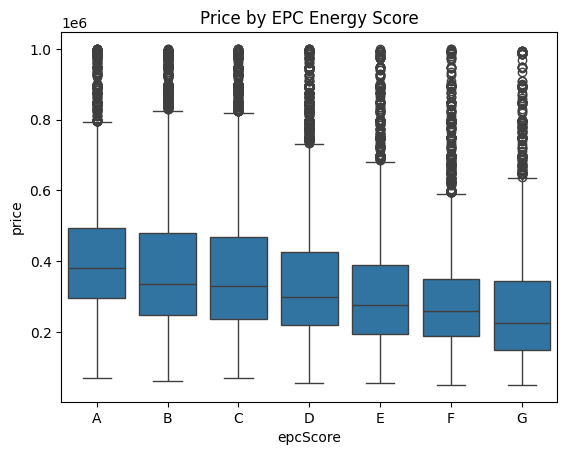

In [ ]:
# yes
def epc_score_price(df):
    sns.boxplot(data=df, x='epcScore', y='price', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    plt.title('Price by EPC Energy Score')
    plt.show()

epc_score_price(df)

In [ ]:
# yes
def interactive_geo_plot_province(df):
    with open('belgium_geo.json') as f:
        belgium_geo = json.load(f)

        df_avg_price_province = (
        df[['province', 'price']]
        .dropna()
        .groupby('province')
        .agg(avg_price=('price', 'mean'), min_price=('price', 'min'), max_price=('price', 'max'), count=('price', 'size'))
        .reset_index()
        )
        fig = px.choropleth(
            df_avg_price_province,
            geojson=belgium_geo,
            locations='province',
            featureidkey='properties.name',
            color='avg_price',
            color_continuous_scale='Viridis',
            hover_name='province',
            hover_data={
                'avg_price': ':.0f',
                'count': True,
                'min_price': ':.0f',
                'max_price': ':.0f'
            },
            title='Average Property Price by Province'
        )

        fig.update_geos(fitbounds="locations", visible=False)
        fig.write_html("geo.html", auto_open=True)

interactive_geo_plot_province(df)